# Big Fungus

A project about classy mushrooms.

In [ ]:
print("Big Fungus")

Big Fungus


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
import os
import matplotlib.pyplot as plt

from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
classes = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']

In [ ]:
# crop image to specific size 
IM_SIZE = 240

def fix_image(image):
    width, height = image.size
    width -= width % 2
    height -= height % 2

    width_half = width // 2
    height_half = height // 2

    if width < height: # preserve width
        image = image.crop((0, height_half - width_half, width, height_half + width_half))
        
    else: # preserve height
        image = image.crop((width_half - height_half, 0, width_half + height_half, height)) 

    image = image.resize((IM_SIZE, IM_SIZE))
    return image

In [ ]:
# go through images and resize them
SOURCE_DIR = './Mushrooms/'
FIXED_DIR = './Mushfixs/'

for mush_class in classes:
    in_path = SOURCE_DIR + mush_class
    out_path = FIXED_DIR + mush_class
    
    if not os.path.isdir(FIXED_DIR):
        os.mkdir(FIXED_DIR)

    for fname in os.listdir(in_path):
        image = Image.open(in_path + '/' + fname)
        try:
            fix_image(image).save(out_path + '/' + fname)
            
        except FileNotFoundError:
            os.mkdir(out_path)
            fix_image(image).save(out_path + '/' + fname)
        

KeyboardInterrupt: 

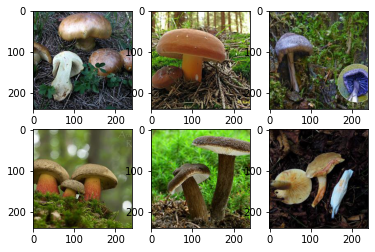

In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

images_dataset = torchvision.datasets.ImageFolder(root='./Mushfixs/', transform=transforms)
dataloader = DataLoader(images_dataset, batch_size=1, shuffle=True)

for i, (image, label) in enumerate(dataloader):
    plt.subplot(2, 3, i+1)
    #plt.axis('off')
    img = image.squeeze(0).numpy().transpose(1, 2, 0)
    plt.imshow(img)
    if i >= 5: break

In [ ]:
# # Load & clean all data

# def load_images_from_folder():
#     transforms = torchvision.transforms.Compose([
#         torchvision.transforms.ToTensor()
#     ])

#     images_dataset = torchvision.datasets.ImageFolder(root='./Mushrooms/', transform=transforms)
#     dataloader = DataLoader(images_dataset, batch_size=1, shuffle=False)
#     return dataloader

# #for c in classes:    
# #in_folder = './Mushrooms/' + c
# #out_folder = './Mushcropped/' + c

# # add cropping code here

# mushrooms = load_images_from_folder()
# #print(mushrooms)

# min_len = 1000
# min_width = 1000
# for img, _ in mushrooms:
#     #print(img)
#     if img.shape[2] < min_len: 
#         min_len = img.shape[2]
#     if img.shape[3] < min_width: 
#         min_width = img.shape[3]
# print(min_len)
# print(min_width)
    

240
360


In [ ]:
# count = 0
# for img, label in mushrooms:
#     if count == 0:
#         print(label)
#     if count == 400:
#         print(label)
#         break
#     count += 1

# images, labels = next(iter(mushrooms))
# print(images.shape)

tensor([0])
tensor([1])
torch.Size([1, 3, 600, 778])


height: 240
Width: 360

In [ ]:
# Crop images to aspect ratio of 1:1 (square)
# Don't cut to min height & width, but rather cut to the smaller dimension of each image, then resize to the smaller of smallest height/width
# For our case, we would resize to 240x240

tensor([0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88b4a261-3cf5-4bb1-820f-4791ebb8a30d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>